## Saikiran N. Pasikanti
### Principal Component Analysis

Use diamonds dataset in ggplot2 package and Perform PCA Analysis.
- a)Perform One Hot encoding on catarorical variables.
- b)Comment on model coefficients.
- c)How many PC's should we select in order to capture atleast 90% Variance.

In [3]:
################  READING THE DATASET                  ######################
library(ggplot2)                                      # Back up of Original dataset
data("diamonds")                                      # loading the diamonds data set from ggplot2 package
head(diamonds)
data <- diamonds                                      # saving the data set as data

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [4]:
dim(data)

[1] 53940    10

In [5]:
################  ONE HOT ENCODING                  ######################
## We will use caret package, dummyVars function to perform label encoding/ one-hot encoding
library(caret)

## Perform one hot encding on each categorical variables
dmy <- dummyVars(" ~color-1", data = data)
dmy2 <- dummyVars(" ~cut-1", data = data)
dmy3 <- dummyVars(" ~clarity-1", data = data)

trsf <- data.frame(predict(dmy, newdata = data))
trsf2 <- data.frame(predict(dmy2, newdata = data))
trsf3 <- data.frame(predict(dmy3, newdata = data))

Loading required package: lattice


In [6]:
## Delete the original categorical columns from dataset
data$cut <- NULL
data$color <- NULL
data$clarity <- NULL

## Combine the encoded columns to dataset
df_all = cbind(data, trsf, trsf2,trsf3)

dim(df_all)
# There are 27 variables present now in dataset

[1] 53940    27

In [9]:
################  PCA                  ######################
model <- prcomp(df_all, center = TRUE, scale. = TRUE)

In [10]:
# Center and Scale refers to respective mean and standard deviation 
# of the variables that are used for normalization prior to implementing PCA

# Outputs the mean of variables
model$center

carat         depth         table         price             x 
 7.979397e-01  6.174940e+01  5.745718e+01  3.932800e+03  5.731157e+00 
            y             z       color.D       color.E       color.F 
 5.734526e+00  3.538734e+00  1.256025e-01  1.816277e-01  1.769003e-01 
      color.G       color.H       color.I       color.J      cut.Fair 
 2.093437e-01  1.539488e-01  1.005191e-01  5.205784e-02  2.984798e-02 
     cut.Good cut.Very.Good   cut.Premium     cut.Ideal    clarity.I1 
 9.095291e-02  2.239896e-01  2.556730e-01  3.995365e-01  1.373749e-02 
  clarity.SI2   clarity.SI1   clarity.VS2   clarity.VS1  clarity.VVS2 
 1.704486e-01  2.422136e-01  2.272525e-01  1.514831e-01  9.391917e-02 
 clarity.VVS1    clarity.IF 
 6.776047e-02  3.318502e-02

In [11]:
# Outputs the standard deviation of variables
model$scale

carat         depth         table         price             x 
    0.4740112     1.4326213     2.2344906  3989.4397381     1.1217607 
            y             z       color.D       color.E       color.F 
    1.1421347     0.7056988     0.3314039     0.3855410     0.3815878 
      color.G       color.H       color.I       color.J      cut.Fair 
    0.4068439     0.3609030     0.3006937     0.2221458     0.1701694 
     cut.Good cut.Very.Good   cut.Premium     cut.Ideal    clarity.I1 
    0.2875448     0.4169190     0.4362429     0.4898077     0.1164003 
  clarity.SI2   clarity.SI1   clarity.VS2   clarity.VS1  clarity.VVS2 
    0.3760300     0.4284268     0.4190609     0.3585225     0.2917189 
 clarity.VVS1    clarity.IF 
    0.2513368     0.1791211

In [12]:
# The rotation measure provides the principal component loading. 
# Each column of rotation matrix contains the principal component loading vector.
model$rotation

# This returns 27 principal components loadings. 
# In a data set, the maximum number of principal component loadings is a minimum of (n-1, p).

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
carat,0.433164860,0.084462888,-0.015346631,-0.010557096,-0.010730710,0.017922358,-0.001852567,-0.0043718961,-0.0030008565,-0.004081469,...,0.031571407,-0.035701217,-0.0047488606,-0.189649734,-0.0433562883,0.691114765,-5.334063e-01,-8.769302e-16,0.000000e+00,0.000000e+00
depth,0.003685492,0.212197109,0.530793811,0.167841695,0.148205053,0.006727219,-0.095913334,-0.0055111200,0.0204890979,-0.016907787,...,0.003325702,-0.481432378,-0.4789330278,0.017610264,0.0887384741,0.027201591,4.958002e-02,3.114759e-17,1.110223e-16,-5.551115e-17
table,0.121534050,-0.540454223,-0.043053112,0.109968963,0.015888595,-0.014748840,-0.007230612,0.0205823113,0.0009947951,0.023037314,...,0.204605217,0.322180780,-0.7015059306,0.005660323,0.0057606331,-0.010900682,2.936553e-03,-1.448936e-16,2.042804e-16,-2.825515e-16
price,0.392503015,0.124379344,-0.108487721,-0.027924479,-0.065504032,0.062803408,-0.011808596,0.0262804074,0.0172730428,-0.007849240,...,0.224455759,-0.137715629,-0.0123989621,-0.745645063,0.0338893886,-0.371366805,1.574604e-01,6.555192e-16,1.494404e-16,-4.261207e-16
x,0.433901409,0.069779431,-0.037017256,-0.027915689,-0.015035355,0.011852801,0.003567743,-0.0016122555,0.0028799620,0.004412681,...,0.015084492,0.008537305,0.0338248116,0.236050822,-0.0735839349,0.371839026,7.742698e-01,3.773528e-16,-1.105033e-16,1.097628e-15
y,0.427196117,0.075656827,-0.036821416,-0.032535613,-0.027844144,0.021180529,0.005565083,-0.0009288319,0.0037699543,0.005452142,...,0.014435914,0.011297562,0.0440555178,0.389535129,0.7391500380,-0.267153637,-1.781025e-01,1.543790e-16,4.104585e-16,-1.113826e-16
z,0.426791426,0.099048242,0.030195331,-0.008818111,-0.003902228,0.019605008,-0.008169337,-0.0017996108,0.0047674265,0.003210487,...,0.018525086,-0.050609816,-0.0240750988,0.382506496,-0.6611703955,-0.402557766,-2.350265e-01,-3.177637e-16,-3.254282e-16,-5.070223e-16
color.D,-0.050273804,-0.057165332,0.088862201,-0.308835354,0.088273546,-0.086139554,-0.023305623,-0.0592660579,0.5897606050,0.079897316,...,0.221210190,-0.185874162,-0.0009986551,0.045341951,-0.0018451723,0.022608272,-8.864500e-03,3.973634e-02,-3.428519e-01,-1.080802e-01
color.E,-0.068227458,-0.095859350,0.054004081,-0.219912239,0.057492801,0.270821623,-0.061963433,-0.5251116325,-0.4037937979,0.172311479,...,0.131209634,-0.123233682,-0.0004959984,0.032458751,-0.0009366129,0.019045850,-6.590573e-03,4.622754e-02,-3.988591e-01,-1.257358e-01
color.F,-0.025626984,-0.015261280,0.007802398,0.031300568,0.089879163,0.079884598,0.538984926,0.6277933199,-0.0860528987,0.176047401,...,-0.015771233,-0.023550434,-0.0149972901,0.015313825,-0.0011537859,0.015664170,-8.680811e-03,4.575354e-02,-3.947694e-01,-1.244466e-01


In [13]:
model$rotation[1:5,1:4]

,PC1,PC2,PC3,PC4
carat,0.433164860,0.08446289,-0.01534663,-0.01055710
depth,0.003685492,0.21219711,0.53079381,0.16784169
table,0.121534050,-0.54045422,-0.04305311,0.10996896
price,0.392503015,0.12437934,-0.10848772,-0.02792448
x,0.433901409,0.06977943,-0.03701726,-0.02791569


In [14]:
summary(model)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     2.2636 1.40375 1.24287 1.16348 1.14539 1.1396 1.11049
Proportion of Variance 0.1898 0.07298 0.05721 0.05014 0.04859 0.0481 0.04567
Cumulative Proportion  0.1898 0.26275 0.31996 0.37010 0.41869 0.4668 0.51246
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.10306 1.09178 1.08806 1.07346 1.05398 1.0509 1.03159
Proportion of Variance 0.04506 0.04415 0.04385 0.04268 0.04114 0.0409 0.03941
Cumulative Proportion  0.55753 0.60168 0.64552 0.68820 0.72935 0.7702 0.80966
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.0182 0.99858 0.97480 0.90551 0.88452 0.59356 0.35275
Proportion of Variance 0.0384 0.03693 0.03519 0.03037 0.02898 0.01305 0.00461
Cumulative Proportion  0.8481 0.88499 0.92018 0.95055 0.97953 0.99258 0.99719
                          PC22   PC23    P

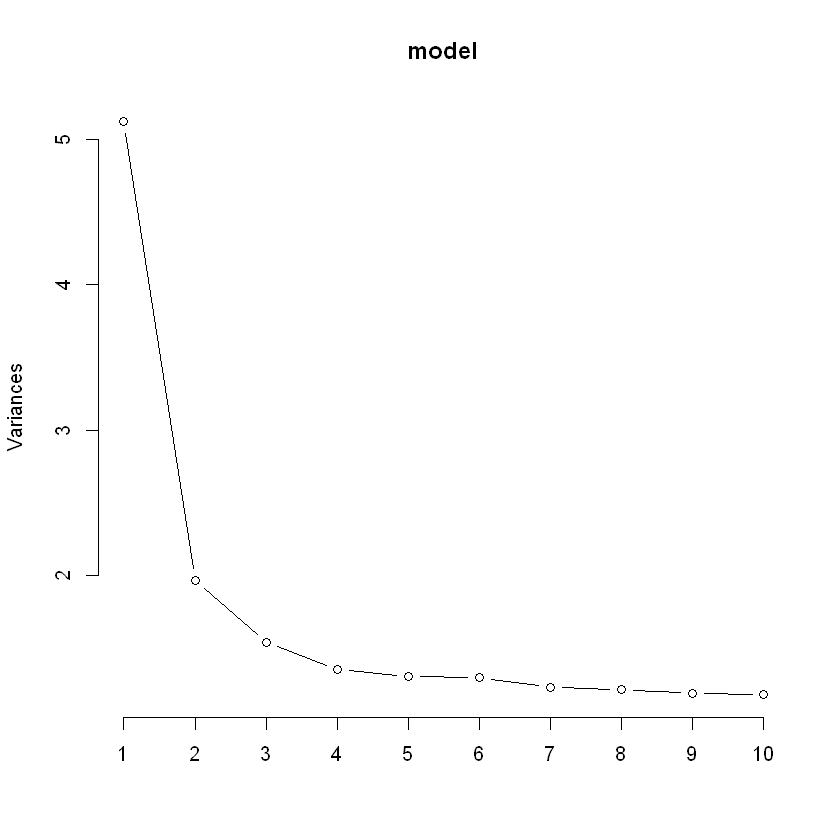

In [15]:
plot(model, type='l')

In [16]:
### Model coefficients

#compute standard deviation of each principal component
std_dev <- model$sdev

In [17]:
#compute variance
pr_var <- std_dev^2
pr_var[1:10]

[1] 5.123706 1.970508 1.544715 1.353697 1.311923 1.298789 1.233196 1.216739
 [9] 1.191982 1.183884

In [18]:
#proportion of variance explained
prop_varex <- pr_var/sum(pr_var)
prop_varex[1:20]

[1] 0.18976690 0.07298178 0.05721166 0.05013693 0.04858974 0.04810330
 [7] 0.04567393 0.04506439 0.04414747 0.04384754 0.04267842 0.04114341
[13] 0.04089972 0.03941389 0.03839903 0.03693178 0.03519417 0.03036866
[19] 0.02897675 0.01304884

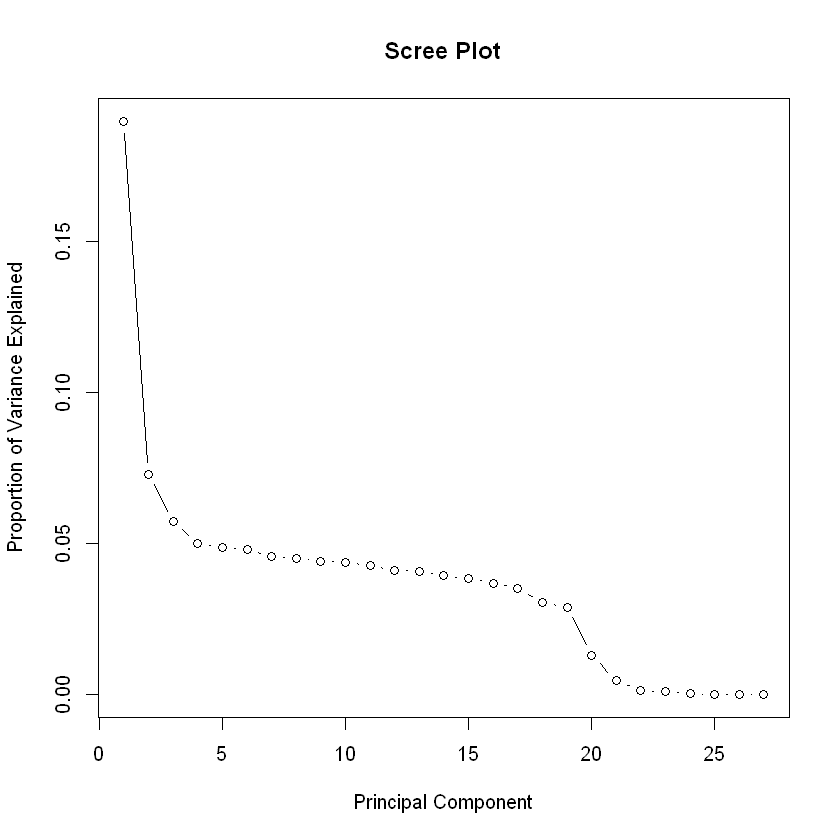

In [19]:
#scree plot
plot(prop_varex, 
       xlab = "Principal Component",
       ylab = "Proportion of Variance Explained",
       type = "b",
       main = "Scree Plot")

## As seen in the plot, the first principal component explains the greatest variance in the data, 
## while the second explains the second most and is orthogonal to the first and so on.

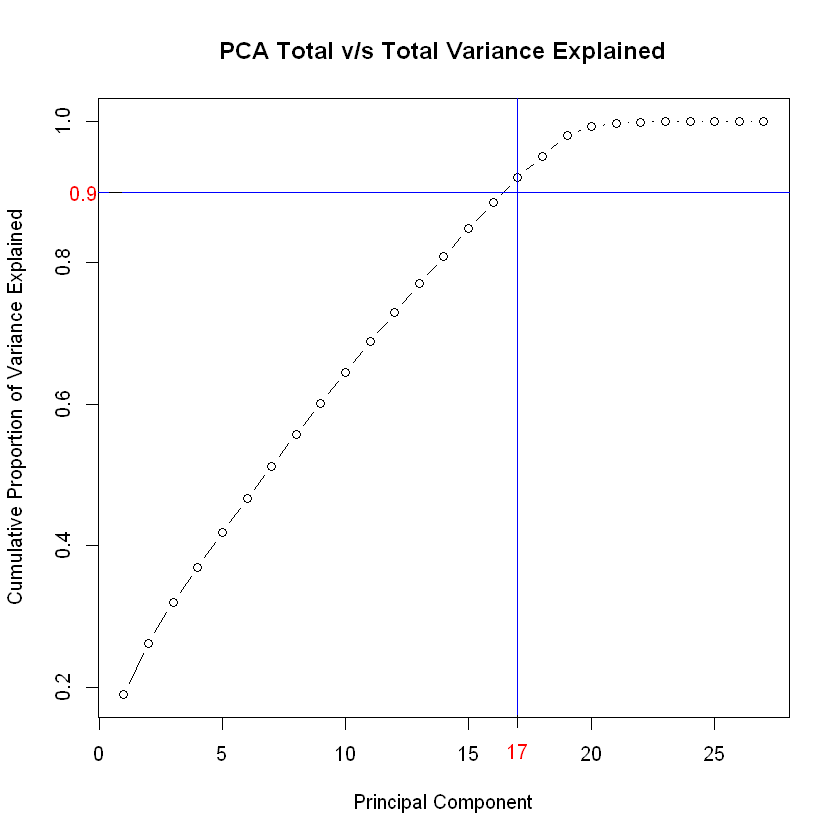

In [20]:
#cumulative scree plot
plot(cumsum(prop_varex), xlab = "Principal Component",
       ylab = "Cumulative Proportion of Variance Explained",
       type = "b",
       main = "PCA Total v/s Total Variance Explained")
abline(h=0.9, col="blue")
abline(v=17, col="blue")
axis(2, at=0.9, labels=0.90, col.axis="red", las=1, pos=0.9)
axis(1, at=17, labels=17, col.axis="red", las=1, pos=0.16)
## In order to capture atleast 90% of the variance, we should select 17 number of principal components